<a href="https://colab.research.google.com/github/TekaFawez/CinemaManagerASP.NET/blob/master/MNIST_Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Information

Cet ensemble de données vous permet d'étudier, d'analyser et de reconnaître des éléments dans les images. C'est exactement comme cela que votre caméra détecte votre visage, en utilisant la reconnaissance d'images ! Il s'agit d'un problème de reconnaissance de chiffres. Ce jeu de données contient 49 000 images de taille 28 X 28, pour un total de 49 Mo.

## Import Modules

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

##Unzip the train data|

In [ ]:
#!unzip Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

##Load the data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
image_path = 'Images/train/'


In [ ]:
# charger des images à partir de fichiers, les convertir en tableaux NumPy et les stocker dans la variable X
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [ ]:
y = df['label']


In [ ]:
print(X.shape, y.shape)


(49000, 28, 28, 1) (49000,)


##Exploratory Data Analysis

9


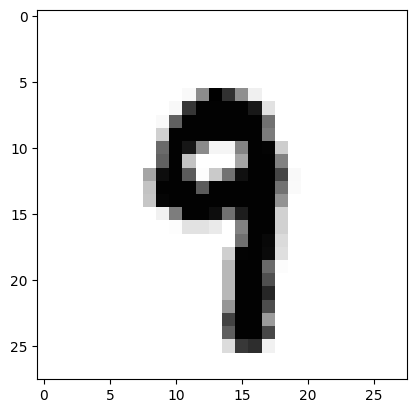

In [ ]:
image_index = 1
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

##Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

##Normalization

In [ ]:
x_train /= 255
x_test /= 255

Model Creation

In [ ]:
# Importation des modules nécessaires de Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Définition de la forme des données d'entrée
input_shape = (28, 28, 1)

# Nombre de classes en sortie (dans ce cas, 10 classes pour les chiffres de 0 à 9)
output_class = 10

# Création d'un modèle séquentiel (succession de couches)
model = Sequential()

# Ajout d'une couche de convolution 2D avec 28 filtres et une fenêtre de taille (3,3), spécifiant la forme d'entrée
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))

# Ajout d'une couche de pooling (max pooling) pour réduire la dimension spatiale
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatir les données en une dimension pour les passer à une couche dense
model.add(Flatten())

# Ajout d'une couche dense avec 128 neurones et une fonction d'activation ReLU
model.add(Dense(128, activation='relu'))

# Ajout d'une couche de dropout avec un taux de dropout de 30% pour régulariser le modèle
model.add(Dropout(0.3))

# Couche de sortie avec le nombre de neurones égal au nombre de classes et une fonction d'activation softmax
model.add(Dense(output_class, activation='softmax'))

# Compilation du modèle en spécifiant l'optimiseur, la fonction de perte et les métriques à suivre
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle sur les données d'entraînement avec un lot de taille 32, sur 30 époques, en utilisant les données de validation
model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1149/1149 [==============================] - 28s 23ms/step - loss: 0.2747 - accuracy: 0.9167 - val_loss: 0.1218 - val_accuracy: 0.9613
Epoch 2/20
1149/1149 [==============================] - 27s 23ms/step - loss: 0.1203 - accuracy: 0.9627 - val_loss: 0.1003 - val_accuracy: 0.9673
Epoch 3/20
1149/1149 [==============================] - 25s 22ms/step - loss: 0.0895 - accuracy: 0.9721 - val_loss: 0.0756 - val_accuracy: 0.9780
Epoch 4/20
1149/1149 [==============================] - 27s 23ms/step - loss: 0.0672 - accuracy: 0.9779 - val_loss: 0.0688 - val_accuracy: 0.9790
Epoch 5/20
1149/1149 [==============================] - 27s 23ms/step - loss: 0.0560 - accuracy: 0.9816 - val_loss: 0.0698 - val_accuracy: 0.9792
Epoch 6/20
1149/1149 [==============================] - 26s 23ms/step - loss: 0.0454 - accuracy: 0.9845 - val_loss: 0.0704 - val_accuracy: 0.9780
Epoch 7/20
1149/1149 [==============================] - 29s 25ms/step - loss: 0.0389 - accuracy: 0.9869 - val_loss: 0.0690 -

1/1 [==============================] - 0s 446ms/step
Predicted output: 1


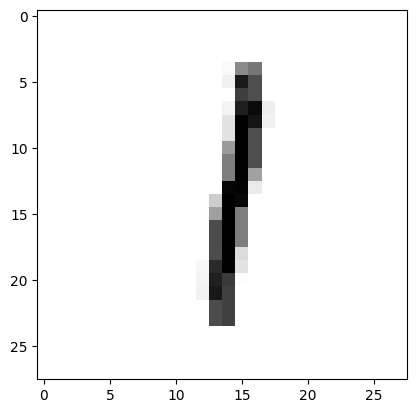

In [ ]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 [==============================] - 0s 29ms/step
Predicted output: 8


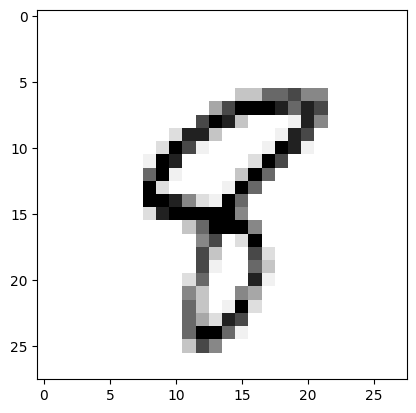

In [ ]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())